In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix\n",
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    x.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label',
           title='Confusion Matrix')
    # Rotate the x-axis labels for better visibility\n",
    plt.setp(ax.get_xticklabels(), rotation=45, alpha="right",
             rotation_mode="anchor")
    # Loop over the data and create text annotations\n",
    fmt = '.2f'  # Format to display the values in the cells\n",
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Matplotlib is building the font cache; this may take a moment.


In [7]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 12.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 546.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 9.6 MB/s eta 0:00:0000:01
     ━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 23.2 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518707 sha256=73b7575769e567623879b18cdbce88957dda06f6dd30aa60b48e2bd34e881704
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f3/7a/25/f297f69029b5e4064e4736a0c4b3996a44cc27781c120bcb99
Successfully built jax
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 3.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import random
%matplotlib inline
import cv2

In [ ]:
import boto3\n",
import cv2\n",
import numpy as np\n",

s3_bucket_name = 'dataset2023'
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')

image_size = 380
labels = ('original', 'fake')
def get_data(data_dir):
    data = []
    for label in labels:
        s3_prefix = f"{data_dir}/{label}",
        response = paginator.paginate(Bucket=s3_bucket_name, Prefix=s3_prefix)
        for page in response:
            for obj in page['Contents']:
                try:\n",
                    image_key = obj['Key']
                    img_bytes = response['Body'].read()
                    img_arr = cv2.imdecode(np.asarray(bytearray(img_bytes), dtype=np.uint8), cv2.IMREAD_COLOR)
                    #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # Convert to RGB format if needed\n",
                    data.append([img_arr, labels.index(label)])
                except Exception as e:
                    print(f"Error processing image: {image_key}")
                    print(f"Failed file name: {image_key.split('/')[-1]}")
                    print(e)
    return np.array(data, dtype='object')
                          
x = get_data("v1")  # Update with the S3 prefix for train data\n",
print(x.shape)

In [16]:
import boto3
import cv2
import numpy as np

s3_bucket_name = 'dataset2023'
s3_client = boto3.client('s3')

image_size = 380
labels = ('original', 'fake')

def get_data(data_dir):
    data = []
    for label in labels:
        s3_prefix = f"{data_dir}/{label}"
        response = s3_client.list_objects(Bucket=s3_bucket_name, Prefix=s3_prefix)
        for obj in response.get('Contents', []):
            try:
                image_key = obj['Key']
                response = s3_client.get_object(Bucket=s3_bucket_name, Key=image_key)
                
                img_bytes = response['Body'].read()
                img_arr = cv2.imdecode(np.asarray(bytearray(img_bytes), dtype=np.uint8), cv2.IMREAD_COLOR)
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # Convert to RGB format if needed
                data.append([img_arr, labels.index(label)])
            except Exception as e:
                print(f"Error processing image: {image_key}")
                print(f"Failed file name: {image_key.split('/')[-1]}")
                print(e)

    return np.array(data, dtype='object')

x = get_data("v1")  # Update with the S3 prefix for train data
print(x.shape)


Error processing image: v1/original/
Failed file name: 
OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:802: error: (-215:Assertion failed) !buf.empty() in function 'imdecode_'

Error processing image: v1/fake/
Failed file name: 
OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:802: error: (-215:Assertion failed) !buf.empty() in function 'imdecode_'

(1998, 2)


In [17]:
from sklearn.model_selection import train_test_split

# 전체 데이터셋을 train과 test로 나누는 비율 설정
train_ratio = 0.8  # 예시로 80%를 train, 20%를 test로 나눕니다.

# 데이터셋을 train과 test로 나눕니다.
train, test = train_test_split(x, test_size=1-train_ratio, random_state=42)

# 데이터셋 크기 출력
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Train data shape: (1598, 2)
Test data shape: (400, 2)


In [18]:
l = []
for i in train:
    if i[1] == 0:
        l.append('real')
    else:
        l.append('fake')

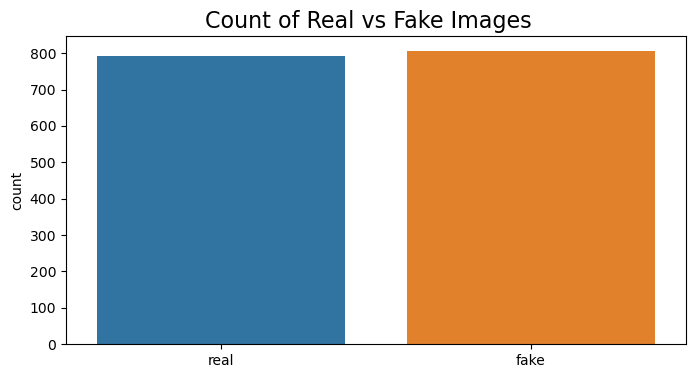

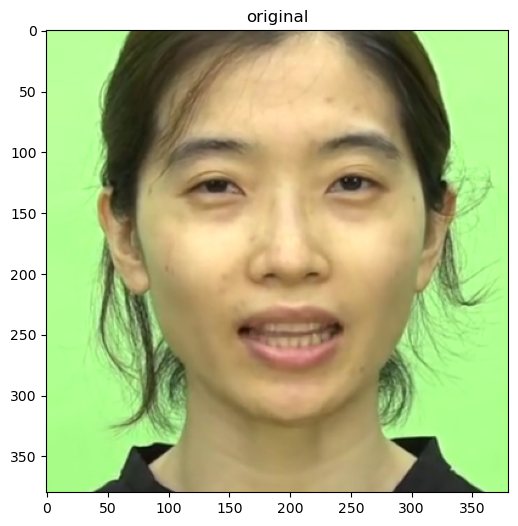

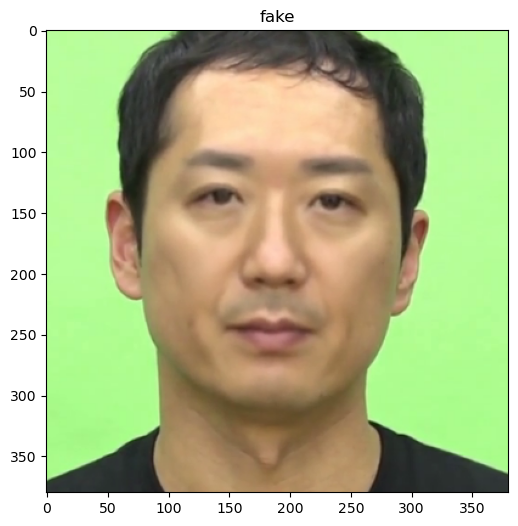

(1598, 380, 380, 3)
(400, 380, 380, 3)
(1598,)
(400,)


In [19]:
plt.figure(figsize=(8, 4))
plt.title('Count of Real vs Fake Images  ', size=16)
sns.countplot(x=l)
plt.show()

# randomly visualizing images to see whats going on
plt.figure(figsize=(8, 6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])
plt.show()

X_train = []
X_test = []
y_train = []
y_test = []

# dividing data into train and test sets
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

# Normalise the image data (to convert it to range from 0 to 1)
X_train = np.array(X_train)# / 255.0

X_test = np.array(X_test) #/ 255.0

# # Reshaping the image data so that every image is the same size
# #X_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

# #X_test.reshape(-1, image_size, image_size, 1)

y_test = np.array(y_test)


y_test = np.array(y_test)
print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Vision Transformer Parameters

In [20]:
num_classes = 2
input_shape = (380, 380, 3)

In [33]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 80
image_size = 112  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

# Data Augmentation

In [27]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(X_train)

# Function to create the multilayer perceptron for classification

In [28]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Class to generate patches

In [29]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Visualizing patches

Image size: 112 X 112
Patch size: 8 X 8
Patches per image: 196
Elements per patch: 192


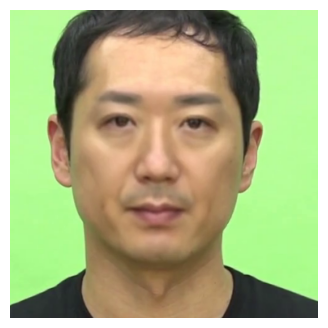

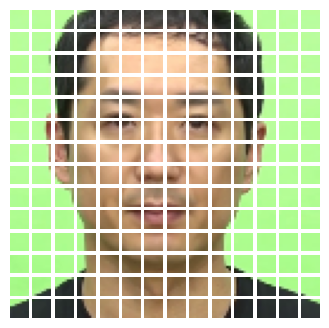

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

# Patch encoder class

In [35]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Creating the VIT Model

In [36]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Running the VIT experiment

Epoch 1/80
6/6 [==============================] - 108s 16s/step - loss: 7.7785 - accuracy: 0.5355 - top-5-accuracy: 1.0000 - val_loss: 0.9492 - val_accuracy: 0.7000 - val_top-5-accuracy: 1.0000
Epoch 2/80
6/6 [==============================] - 97s 16s/step - loss: 1.3206 - accuracy: 0.6064 - top-5-accuracy: 1.0000 - val_loss: 0.4982 - val_accuracy: 0.7063 - val_top-5-accuracy: 1.0000
Epoch 3/80
6/6 [==============================] - 95s 16s/step - loss: 0.7750 - accuracy: 0.6711 - top-5-accuracy: 1.0000 - val_loss: 0.4709 - val_accuracy: 0.7250 - val_top-5-accuracy: 1.0000
Epoch 4/80
6/6 [==============================] - 97s 16s/step - loss: 0.6384 - accuracy: 0.7177 - top-5-accuracy: 1.0000 - val_loss: 0.4392 - val_accuracy: 0.7312 - val_top-5-accuracy: 1.0000
Epoch 5/80
6/6 [==============================] - 96s 16s/step - loss: 0.5419 - accuracy: 0.7636 - top-5-accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.8562 - val_top-5-accuracy: 1.0000
Epoch 6/80
6/6 [==================

6/6 [==============================] - 97s 16s/step - loss: 0.1161 - accuracy: 0.9541 - top-5-accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9812 - val_top-5-accuracy: 1.0000
Epoch 44/80
6/6 [==============================] - 95s 16s/step - loss: 0.1056 - accuracy: 0.9590 - top-5-accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9750 - val_top-5-accuracy: 1.0000
Epoch 45/80
6/6 [==============================] - 97s 16s/step - loss: 0.1187 - accuracy: 0.9520 - top-5-accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9312 - val_top-5-accuracy: 1.0000
Epoch 46/80
6/6 [==============================] - 95s 16s/step - loss: 0.1085 - accuracy: 0.9569 - top-5-accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9750 - val_top-5-accuracy: 1.0000
Epoch 47/80
6/6 [==============================] - 95s 16s/step - loss: 0.0922 - accuracy: 0.9666 - top-5-accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9875 - val_top-5-accuracy: 1.0000
Epoch 48/80
6/6 [=========================

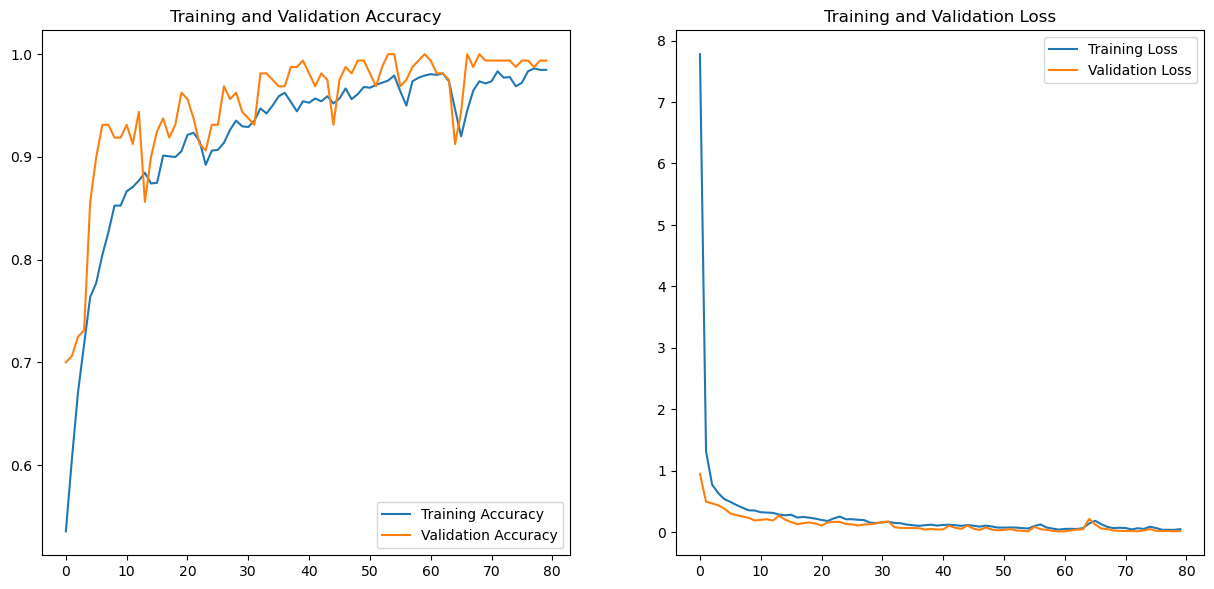

[[1.    0.035]
 [0.    0.965]]


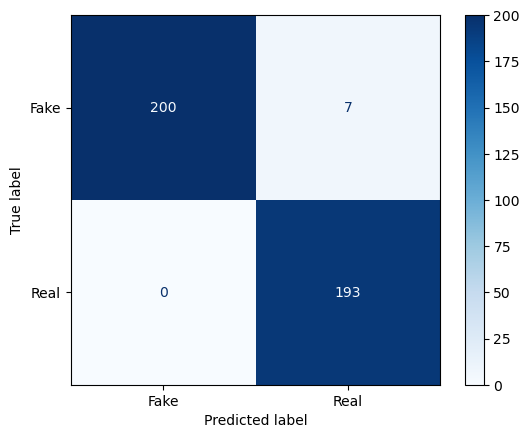

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # checkpoint_filepath = "/tmp/checkpoint"
    # checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #     checkpoint_filepath,
    #     monitor="val_accuracy",
    #     save_best_only=True,
    #     save_weights_only=True,
    # )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
    )
    predictions = np.argmax(model.predict(X_test), axis=-1)

# Regain the original shape to evaluate predictions
    predictions = predictions.reshape(1, -1)[0]

    # Let’s also print the classification report to get more detailed results. (save it to pickel , early stopping)
    print(classification_report(y_test, predictions, target_names=['Healthy(class 0)', 'UnHealthy(class 1)']))
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions) * 100)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # should be 5 for now should be 50
    epochs_range = range(80)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    #building the confusion matrix
    result = confusion_matrix(y_test, predictions , normalize='pred')
    print(result)
    labels = ["Fake", "Real"]
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # model.load_weights(checkpoint_filepath)
    # _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

In [38]:
import os

current_path = os.getcwd()
print(current_path)

/home/ec2-user/SageMaker


In [40]:
vit_classifier.save("/home/ec2-user/SageMaker/saved_model.h5")

In [4]:
!git clone https://github.com/suhwanjo/Capstone-Disign.git

Cloning into 'Capstone-Disign'...


In [5]:
!git add .

fatal: not a git repository (or any parent up to mount point /home/ec2-user)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
